In [4]:
# The normal imports
import numpy as np
import pandas as pd
from numpy.random import randn

# Import the stats
from scipy import stats

# These are the plotting modules and libraries we'll use:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Command so that plots appear in the iPython Notebook
%matplotlib inline

In [5]:
dataset = randn(25)

(0, 1)

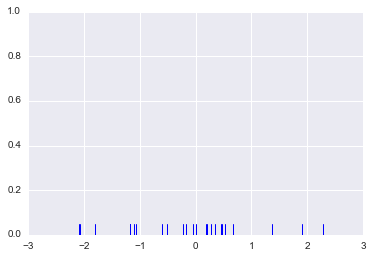

In [7]:
sns.rugplot(dataset)
plt.ylim(0,1)

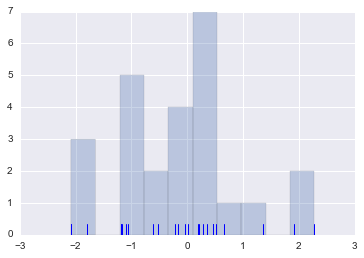

In [8]:
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

(0, 1)

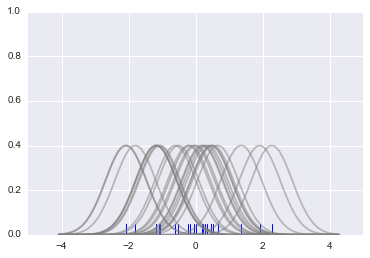

In [9]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2

x_axis = np.linspace(x_min,x_max,100)

bandwidth = ( (4*dataset.std()**5) / (3*len(dataset))) ** 0.2

kernel_list = []

for data_point in dataset:
    # create a kernel for each point and append it to the kernel_list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis,kernel, color = 'grey', alpha = 0.5)
    
plt.ylim(0,1)

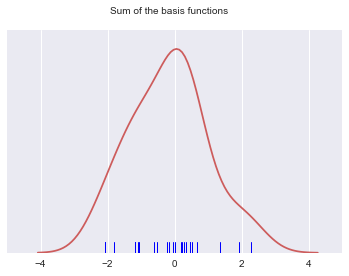

In [10]:
sum_of_kde = np.sum(kernel_list, axis=0)

fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

sns.rugplot(dataset)

plt.yticks([])
plt.suptitle("Sum of the basis functions")

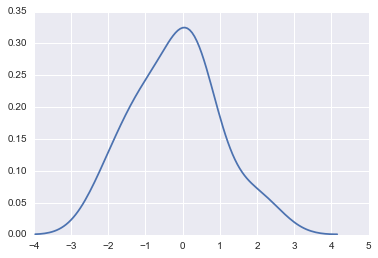

In [11]:
sns.kdeplot(dataset)

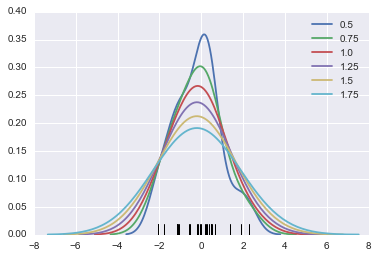

In [12]:
sns.rugplot(dataset, color='black')

# kde with variable bandwidths
for bw in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw = bw, lw=1.8, label=bw)

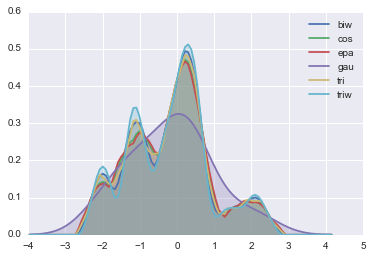

In [15]:
kernel_options = ['biw','cos','epa','gau','tri','triw']

for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern, shade = True)

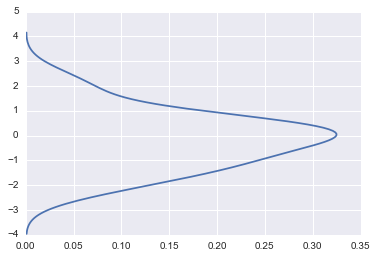

In [16]:
sns.kdeplot(dataset, vertical=True)

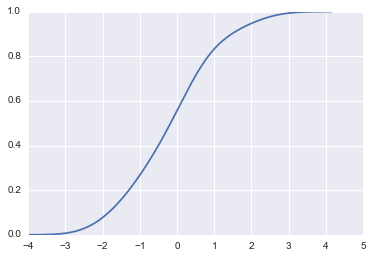

In [17]:
sns.kdeplot(dataset,cumulative=True)

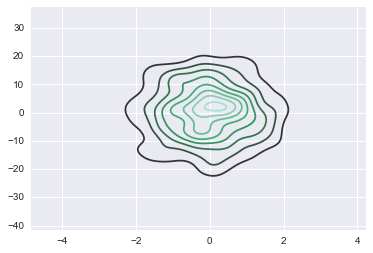

In [18]:
mean = [0,0]
cov = [[1,0], [0,100]]

dataset2 = np.random.multivariate_normal(mean, cov, 1000)

dframe = pd.DataFrame(dataset2, columns = ['X','Y'])
sns.kdeplot(dframe)

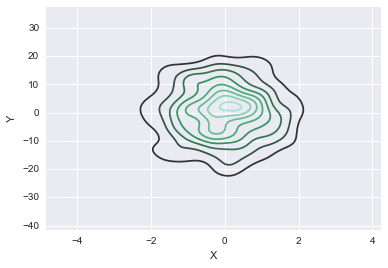

In [19]:
sns.kdeplot(dframe.X, dframe.Y)

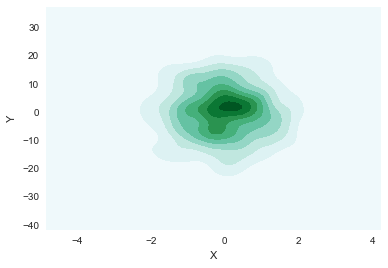

In [20]:
sns.kdeplot(dframe.X, dframe.Y,shade = True)

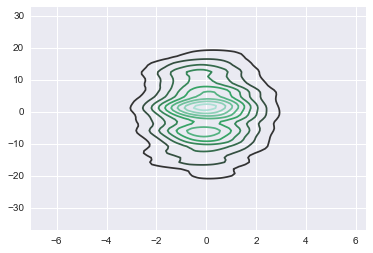

In [21]:
sns.kdeplot(dframe, bw=1)

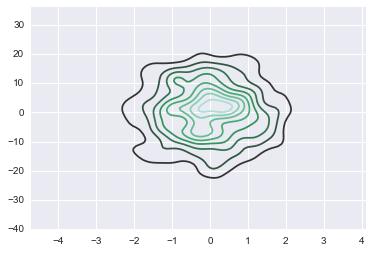

In [22]:
sns.kdeplot(dframe,bw='silverman')

/Users/seungjinbaek/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


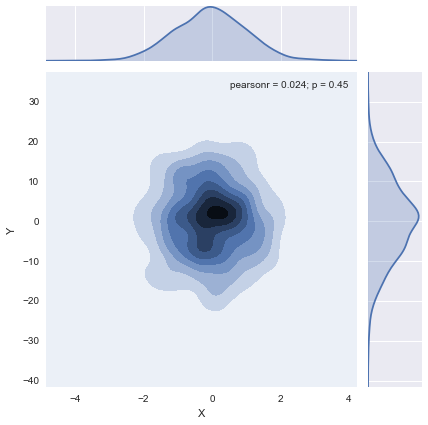

In [23]:
sns.jointplot('X','Y',dframe,kind='kde')